In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import torch
from celluloid import Camera
from matplotlib.backend_bases import FigureCanvasBase
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import timeit

from src.environment_old import LogEnv_old
from src.utils import path_distance_new, check_missing_vertexes_jampr

from src.or_functions import compute_distance

#from src.environment import LogEnv
#from src.train import train
#from src.architecture import AttentionModel
#from src.evaluation import compute_mean_metric, compute_data_metric, compute_mean_metric_with_or
#from src.vizualisation import demonstration, action_animation
from src.environment_jampr import LogEnv
from src.architecture_jampr_2 import AttentionModel
from src.train_jampr import train
from src.or_functions_jampr import compute_distance
from src.evaluation_jampr import compute_mean_metric, compute_mean_metric_with_or
from src.vizualisation_jampr import demonstration, env_plot

## Отладка

In [ ]:
env = LogEnv(n=20, batch_size=1, active_num=1)
env.reset()
'a'

In [ ]:
am = AttentionModel(active_num=1).to('cuda')
model.load_state_dict(weights)

In [ ]:
features, _, mask = env.reset(full_reset=False)
print(mask)
print(env.pairs)
print(features[0][:, :, 3:5])
print(features[0][:, :, 2])
flag = False
while not flag:
    v1 = int(input())
    v2 = int(input())
    v = torch.tensor([v1, v2]).view(1, -1)
    v1 = int(input())
    v2 = int(input())
    v_m = torch.tensor([v1, v2]).view(1, -1)
    v = torch.cat([v, v_m], dim=0)
    print(v)
    #print(d[0, v[0, 1], :])
    features, mask, flag = env.step(v)
    features = list(map(lambda x: x.to('cuda'), features))
    print(mask)
    print(flag)
print(env.tour_plan)
print(features[2][:, :, 4].sum().to('cpu') + check_missing_vertexes_jampr(env.tour_plan, problem_size) * 10000)

#20 -> 13 -> 2 -> 16 -> 18 -> 15 -> 14 -> 3
#9 -> 1 -> 17 -> 10 -> 7 -> 8
#19 -> 12 -> 5 -> 11 -> 6 -> 4


#17 -> 9 -> 7 -> 1 -> 19 -> 12 -> 11 -> 6
#13 -> 3
#2 -> 15
#20 -> 5 -> 4 -> 14
#10 -> 8 -> 16 -> 18

In [ ]:
device = 'cuda'

In [ ]:
problem_size = 20

In [ ]:
#env = LogEnv(n=20, batch_size=2, active_num=1)
features, d, mask = env.reset(full_reset=False)
print(mask)
print(env.pairs)
print(features[0][:, :, 3:5])
features = list(map(lambda x: None if x is None else x.to(device), features))
flag = False
t = 0
while not flag:
    v, p = model(features, mask, t, sample=False)
    t = t + 1
    v = v.to('cpu')
    print(v, p)
    print(d[0, v[0, 1], :])
    features, mask, flag = env.step(v)
    features = list(map(lambda x: None if x is None else x.to(device), features))
    print(flag)
    #print(mask)
print(env.tour_plan)
print(features[2][:, :, 4].sum(dim=1).to('cpu') + check_missing_vertexes_jampr(env.tour_plan, problem_size) * 1000)


#20 -> 13 -> 2 -> 16 -> 18 -> 15 -> 14 -> 3
#9 -> 1 -> 17 -> 10 -> 7 -> 8
#19 -> 12 -> 5 -> 11 -> 6 -> 4

In [ ]:
data = {}
data['time_matrix'] = env.distance.numpy()[0].squeeze()
data['num_vehicles'] = 10
data['time_windows'] = env.tw.numpy()[0].squeeze()
data['demands'] = env.demand.numpy()[0].squeeze()*env.capacity
data['vehicle_capacities'] = [env.capacity]*data['num_vehicles']
data['pickups_deliveries'] = env.pairs
compute_distance(data, eps=1e-2, time_limit=0.5)

In [ ]:
float()

In [ ]:
data = {}
data['time_matrix'] = env.distance.numpy()[1].squeeze()
data['num_vehicles'] = 10
data['time_windows'] = env.tw.numpy()[1].squeeze()
data['demands'] = env.demand.numpy()[1].squeeze()*env.capacity
data['vehicle_capacities'] = [env.capacity]*data['num_vehicles']
data['pickups_deliveries'] = env.pairs
compute_distance(data, eps=1e-2, time_limit=1)

## Обучение

In [3]:
model = AttentionModel(active_num=1)
model = model.to('cuda')

In [4]:
%%time
weights, _, _, _, _ = train(model, device="cuda", problem_size=50, batch_size=48, epochs=100, T=10, lr=1e-4, decay=0.001)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
| ID | GPU | MEM |
------------------
|  0 |  0% |  9% |
| ID | GPU | MEM |
------------------
|  0 |  3% | 16% |
| ID | GPU | MEM |
------------------
|  0 |  3% | 17% |
| ID | GPU | MEM |
------------------
|  0 | 19% | 18% |
| ID | GPU | MEM |
------------------
|  0 | 19% | 20% |
| ID | GPU | MEM |
------------------
|  0 | 19% | 21% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 23% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 24% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 25% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 27% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 28% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 30% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 65% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 65% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 65% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 65% |
tensor(66545.2109)
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU |

| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 65% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 65% |
| ID | GPU | MEM |
------------

  1%|▊                                                                                 | 1/100 [00:34<56:57, 34.52s/it]

tensor([[ 4,  3],
        [ 9, 20],
        [30, 33],
        [34, 36],
        [26,  5],
        [40, 22],
        [39, 49],
        [15, 19],
        [23, 14],
        [46, 27],
        [ 8, 47],
        [11,  2],
        [10,  6],
        [48, 16],
        [41, 28],
        [18, 38],
        [45, 32],
        [25,  7],
        [ 1, 50],
        [43, 42],
        [17, 37],
        [35, 31],
        [12, 29],
        [21, 44],
        [24, 13]])
tensor([[34, 17, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [12, 29, 40, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [48, 11,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  5% | 66% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 66% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 66% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 14% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 14% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 66% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 66% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 66% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 66% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  4% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 16% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 16% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 16% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 16% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 16% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 16% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 | 11% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 69% |
tensor(46980.4570)
| ID | GPU | MEM |
------------------
|  0 |  6% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 69% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 69% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 69% |
| ID | GPU |

  2%|█▋                                                                                | 2/100 [01:10<57:17, 35.08s/it]

tensor([[10, 20],
        [39, 29],
        [31, 49],
        [41, 30],
        [25, 42],
        [ 8, 28],
        [44,  3],
        [45, 26],
        [21, 37],
        [14, 33],
        [16, 23],
        [48,  4],
        [38, 27],
        [ 5, 24],
        [15, 18],
        [ 6,  2],
        [ 9, 32],
        [35, 36],
        [17, 46],
        [43, 47],
        [ 7, 12],
        [19, 11],
        [ 1, 40],
        [34, 13],
        [22, 50]])
tensor([[10, 38,  6,  5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [45, 16, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [44,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  5% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 | 12% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 80% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 80% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 81% |
| ID | GPU | MEM |
------------

  3%|██▍                                                                             | 3/100 [01:54<1:00:36, 37.49s/it]

tensor([[34, 22],
        [27, 26],
        [50, 31],
        [ 3, 13],
        [35, 19],
        [ 7, 45],
        [33, 30],
        [15, 10],
        [38,  6],
        [36, 21],
        [47, 48],
        [39,  4],
        [43, 28],
        [46,  9],
        [29, 49],
        [20,  5],
        [23,  8],
        [42,  1],
        [44, 37],
        [16, 14],
        [11, 17],
        [12, 25],
        [40,  2],
        [32, 24],
        [41, 18]])
tensor([[29, 41, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [16, 32, 47, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [33, 43, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 81% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 81% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 81% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  4% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 82% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 82% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 82% |
| ID | GPU | MEM |
------------

  4%|███▏                                                                            | 4/100 [02:37<1:02:52, 39.29s/it]

tensor([[36, 29],
        [15, 48],
        [45, 24],
        [16, 28],
        [ 3, 21],
        [ 8,  9],
        [18, 32],
        [ 4,  1],
        [27, 19],
        [ 6, 49],
        [42, 41],
        [39, 50],
        [22, 12],
        [11, 23],
        [47, 20],
        [34, 38],
        [ 5, 10],
        [35, 25],
        [13, 37],
        [17, 14],
        [ 2, 31],
        [43, 46],
        [ 7, 30],
        [26, 44],
        [33, 40]])
tensor([[36,  6,  3, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [35, 13,  7, 26, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [39,  2, 11, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  0% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  0% | 82% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 82% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 82% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 82% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 82% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------

  5%|████                                                                            | 5/100 [03:19<1:03:41, 40.22s/it]

tensor([[12,  7],
        [15, 30],
        [20, 24],
        [14, 46],
        [34, 19],
        [35, 50],
        [44,  1],
        [ 6, 28],
        [ 5,  9],
        [11,  3],
        [18,  4],
        [45, 13],
        [ 8, 38],
        [29, 41],
        [26, 47],
        [25, 36],
        [42, 17],
        [33, 16],
        [23, 37],
        [ 2, 31],
        [39, 21],
        [48, 10],
        [22, 32],
        [27, 49],
        [43, 40]])
tensor([[39,  8,  6, 12,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [29, 11, 14, 44,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [45, 18, 25, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
tensor(40290.8633)
| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU |

| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------

|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU |

  6%|████▊                                                                           | 6/100 [04:02<1:04:16, 41.02s/it]

tensor([[32, 21],
        [37,  2],
        [49, 23],
        [17, 16],
        [ 8, 34],
        [27, 44],
        [29, 47],
        [24, 18],
        [13, 46],
        [ 5,  6],
        [19, 42],
        [25, 41],
        [ 4, 45],
        [ 7, 20],
        [11,  1],
        [39, 22],
        [50, 31],
        [40, 15],
        [ 3, 48],
        [38, 26],
        [43, 33],
        [28, 12],
        [35, 14],
        [10,  9],
        [30, 36]])
tensor([[29, 24,  3, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [17, 25,  4,  5, 32, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [43,  7, 13, 27, 28, 39, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 | 13% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------

|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 83% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 83% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU |

  7%|█████▌                                                                          | 7/100 [04:46<1:04:45, 41.78s/it]

tensor([[ 6,  4],
        [39, 43],
        [48, 49],
        [10, 37],
        [11, 13],
        [18, 15],
        [29, 23],
        [36,  9],
        [26, 27],
        [17, 38],
        [22, 35],
        [31,  7],
        [32, 47],
        [19, 33],
        [40, 30],
        [ 8, 20],
        [ 1,  3],
        [ 2, 28],
        [34, 41],
        [12, 21],
        [24, 50],
        [44, 25],
        [45, 46],
        [ 5, 14],
        [16, 42]])
tensor([[32, 17,  1,  2, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 5,  6,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [36, 10, 18, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 83% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 83% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 83% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------

  8%|██████▍                                                                         | 8/100 [05:29<1:04:35, 42.13s/it]

tensor([[10,  6],
        [ 1, 26],
        [ 7, 40],
        [48, 11],
        [13, 49],
        [22, 29],
        [17, 37],
        [46, 32],
        [44, 23],
        [ 9, 21],
        [39, 19],
        [ 5, 30],
        [ 3, 31],
        [45, 28],
        [ 8, 43],
        [50, 38],
        [33,  4],
        [14, 27],
        [25, 35],
        [16, 18],
        [42,  2],
        [34, 47],
        [36, 20],
        [12, 24],
        [41, 15]])
tensor([[ 1,  8,  9, 10,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [46,  5, 12, 14, 27, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 7, 16, 17, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  2% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 83% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 83% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 | 12% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 12% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 10% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 11% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  9% | 84% |
| ID | GPU | MEM |
------------------
|  0 | 13% | 84% |
| ID | GPU | MEM |
------------

  9%|███████▏                                                                        | 9/100 [06:12<1:04:21, 42.44s/it]

tensor([[38, 36],
        [41, 37],
        [20, 26],
        [46,  1],
        [ 8, 44],
        [11, 28],
        [21, 25],
        [ 6,  2],
        [10,  5],
        [42, 24],
        [45, 48],
        [39, 23],
        [16, 17],
        [ 9, 12],
        [33, 18],
        [50, 13],
        [19,  7],
        [30, 35],
        [43, 47],
        [14, 32],
        [15, 29],
        [ 3, 27],
        [ 4, 49],
        [40, 31],
        [34, 22]])
tensor([[15,  3,  4, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [11,  6,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 9, 10,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  0% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------

 10%|███████▉                                                                       | 10/100 [06:55<1:03:43, 42.48s/it]

tensor([[ 9, 26],
        [36,  3],
        [21, 41],
        [ 5, 47],
        [25, 11],
        [46, 15],
        [20, 18],
        [50,  2],
        [14, 27],
        [16, 30],
        [ 4, 24],
        [43, 32],
        [31, 45],
        [28, 29],
        [37,  6],
        [ 8, 23],
        [19, 39],
        [44, 40],
        [ 7, 42],
        [33, 17],
        [22, 48],
        [13, 38],
        [49, 35],
        [34,  1],
        [10, 12]])
tensor([[20,  4,  7, 13, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [16,  8, 14, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [43, 21, 28, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  1% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------

| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  8% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  4% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------

 11%|████████▋                                                                      | 11/100 [07:38<1:03:26, 42.77s/it]

tensor([[48, 28],
        [ 1, 46],
        [16, 18],
        [15, 27],
        [17, 38],
        [36, 34],
        [24,  3],
        [35, 13],
        [44, 26],
        [14, 23],
        [42,  8],
        [47, 11],
        [50, 40],
        [30, 33],
        [ 4,  5],
        [32,  2],
        [39, 41],
        [20, 10],
        [49, 19],
        [12,  9],
        [31,  6],
        [21, 29],
        [25, 43],
        [ 7, 37],
        [22, 45]])
tensor([[47,  1,  4,  7, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [20, 12, 15, 16, 21, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [49, 17, 35, 36, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
    

| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  6% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  5% | 84% |
| ID | GPU | MEM |
------------------
|  0 |  7% | 84% |
| ID | GPU | MEM |
------------

KeyboardInterrupt: 

## Анимация

In [ ]:
opts = {'demand_type': {'distribution': 'uniform', 'max_demand':10},
        #'tw_type': {'distribution': 'uniform'},
        #"pickup_and_delivery":True
       }

n = 10
batch_size = 1
env = LogEnv(batch_size=batch_size, n=n, opts=opts)

features, distances, mask = env.reset()

demonstration(env, opts)

In [ ]:
actions_ext = np.array([2, 7, 3, 5, 1, 0, 6, 8, 9, 4])
action_animation(env, opts, actions_ext, '1-OtOPDTW.gif', 500)

In [ ]:
env = LogEnv(n=10, batch_size=1)
env.reset()
print('ready')

In [ ]:
env_plot(env)

In [ ]:
demonstration(env, model, device)

## Проверка модели CVRP, обученной на сервере

In [ ]:
file_name = 'JAMPR_TW1_20_Feb_13_05_57_10_2021'

In [ ]:
f = open('./models/' + file_name + '_best.pkl', 'rb')
weights = pickle.load(f)
f.close()

In [3]:
file_name = 'JAMPR_TW1_20_Feb__6_11_23_38_2021'

In [4]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [5]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

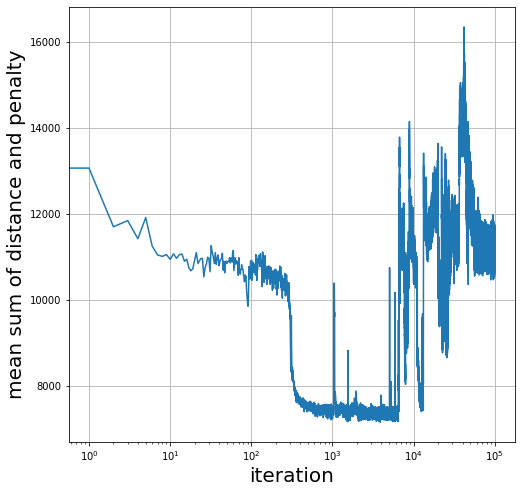

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

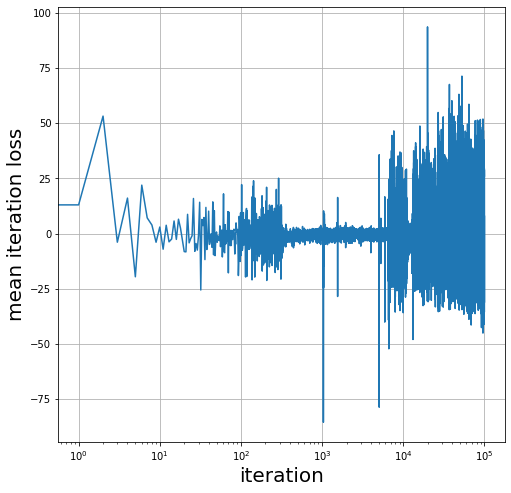

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [8]:
file_name = 'JAMPR_TW1_20_Feb__8_20_09_51_2021'

In [9]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [10]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

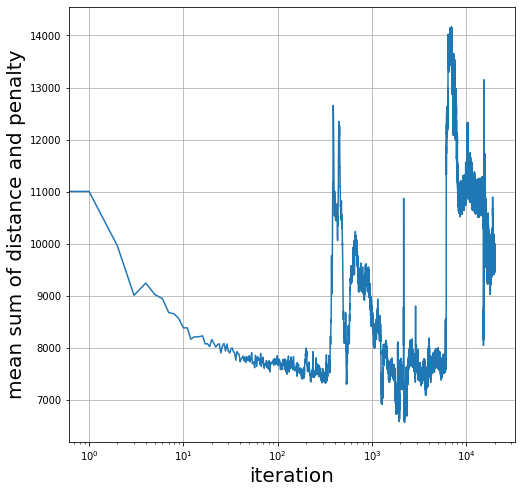

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

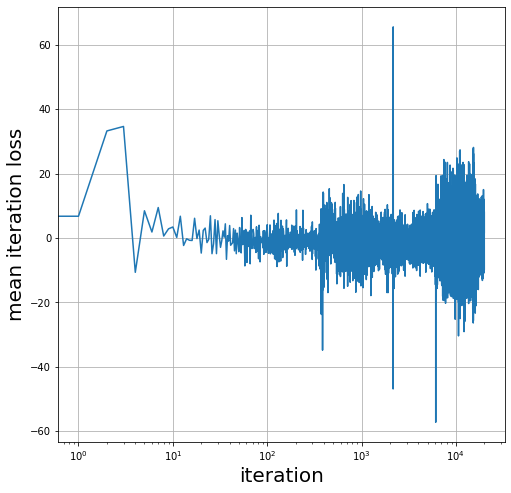

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [13]:
file_name = 'JAMPR_TW1_20_Feb_10_14_16_41_2021'

In [14]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [15]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

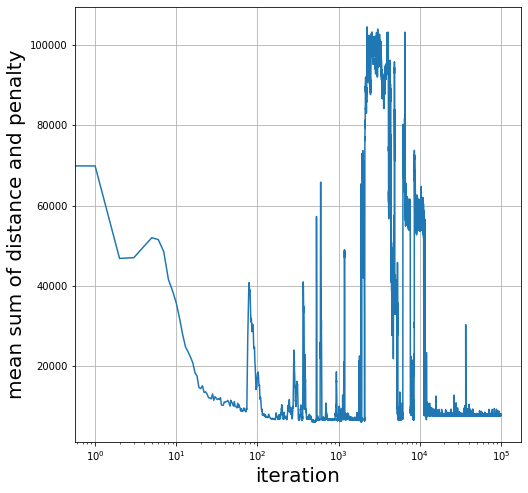

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

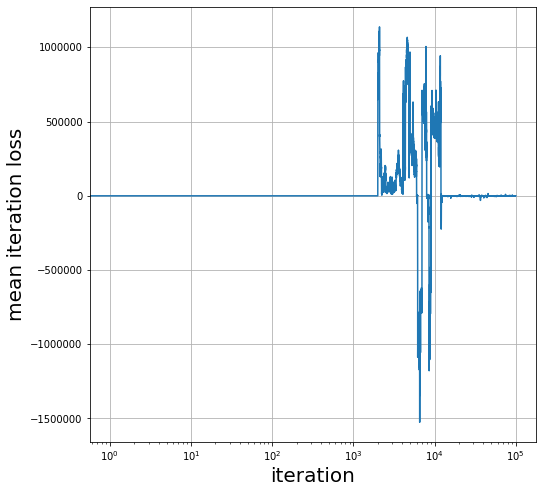

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [18]:
file_name = 'JAMPR_TW1_20_Feb_12_17_23_34_2021'

In [19]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [20]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

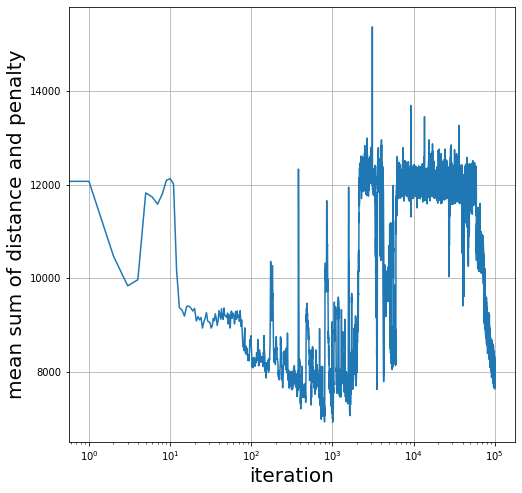

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

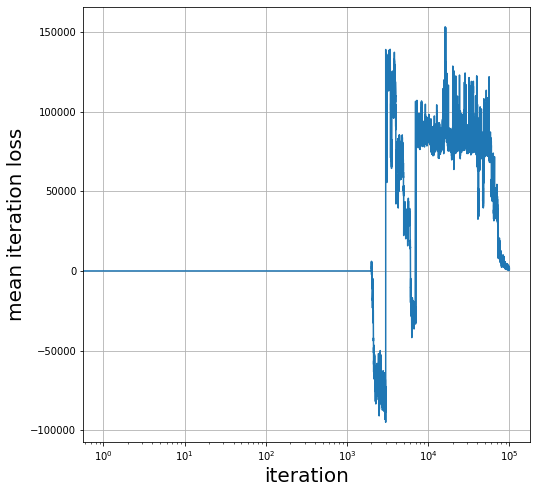

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [23]:
file_name = 'JAMPR_TW1_20_Feb_12_18_22_54_2021'

In [24]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [25]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

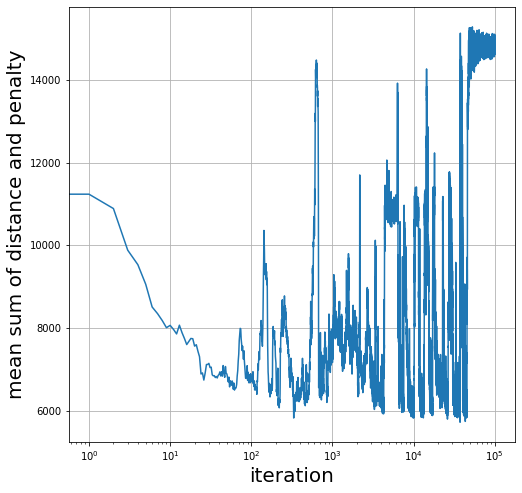

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

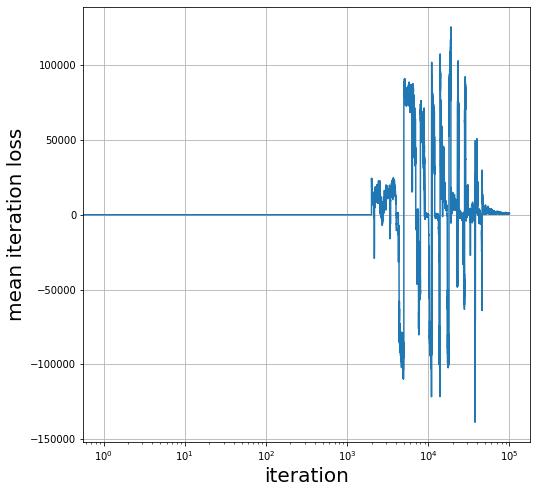

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [28]:
file_name = 'JAMPR_TW1_20_Feb_13_05_57_10_2021'

In [29]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [30]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

(4000, 14000)

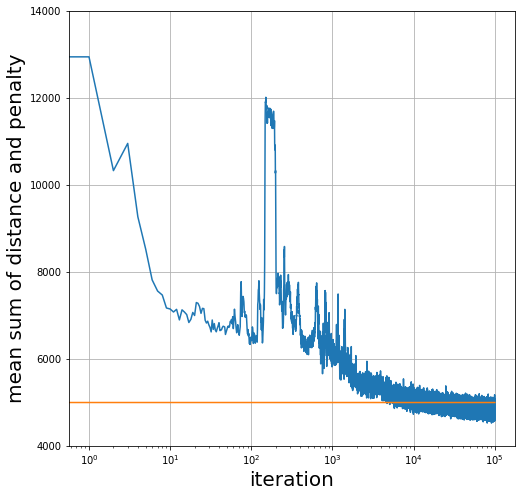

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.plot(np.ones(len(reward))*5000, )
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
plt.ylim([4000, 14000])
#fig.savefig('reward_20_twtsp.png')

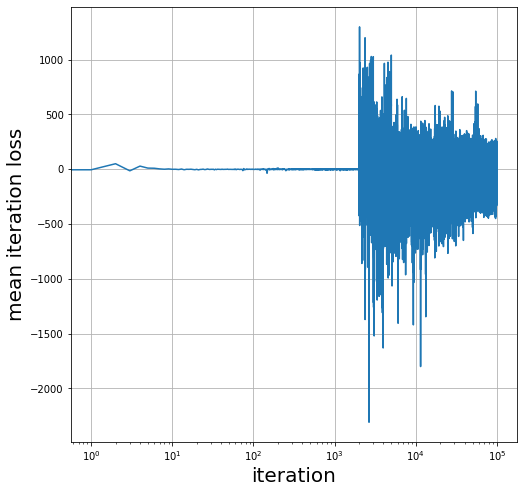

In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [33]:
file_name = 'JAMPR_TW1_20_Feb_15_04_32_07_2021'

In [34]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [35]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

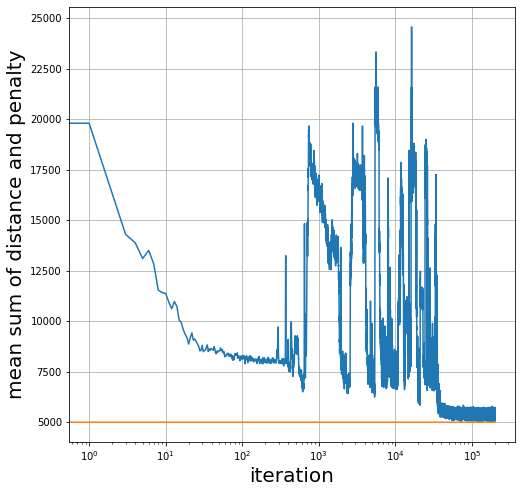

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.plot(np.ones(len(reward))*5000)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

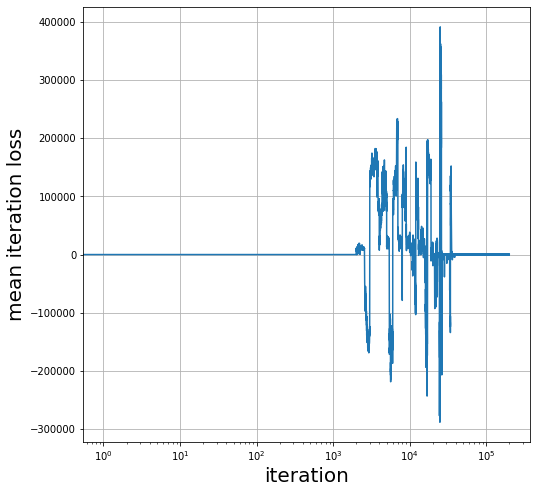

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [38]:
file_name = 'JAMPR_TW1_20_Feb_15_05_17_10_2021'

In [39]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [40]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

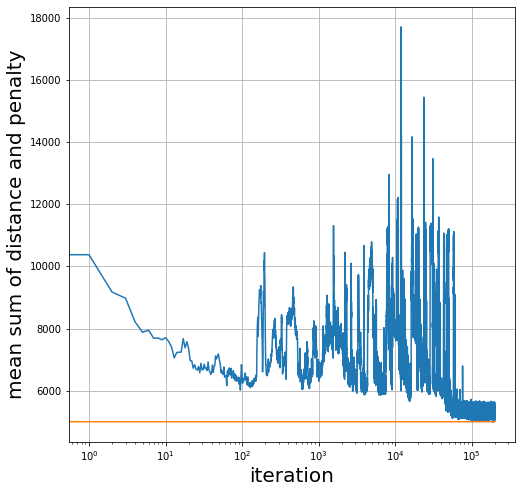

In [41]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.plot(np.ones(len(reward))*5000, )
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
#fig.savefig('reward_20_twtsp.png')

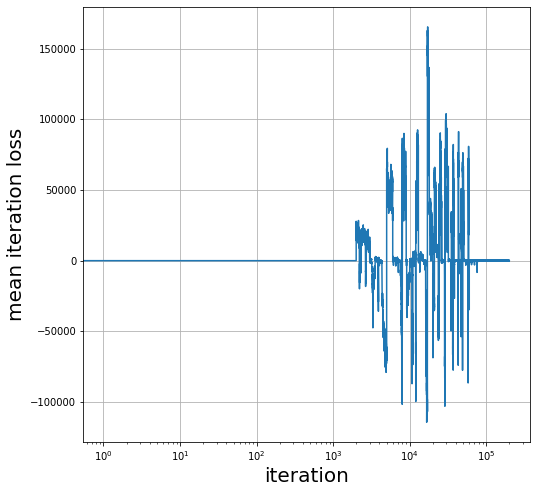

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
#fig.savefig('loss_20_twtsp.png')

In [ ]:
model = AttentionModel(active_num=1).to("cuda")
model.load_state_dict(weights)

In [ ]:
model.eval()
print('r')

In [ ]:
%%time
compute_mean_metric(model, device="cuda", n=20, batch_size=1, T=10, sample=True)

In [ ]:
%%time
compute_mean_metric_with_or(model, device="cuda", n=20, batch_size=20, T=1, time_limit=0.5, eps=1e-2)